<h1>Отчёта пока нет</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binomtest
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression 

In [2]:
# для первого запуска установить библиотеки:
# !pip install kaggle
# !pip install opendatasets

import opendatasets as od

dataset = 'https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2023-developers-survey'
file = 'survey_results_public.csv'

# загрузка датасета с kaggle
od.download(dataset)

Skipping, found downloaded files in ".\stack-overflow-2023-developers-survey" (use force=True to force download)


In [3]:
cd

C:\Users\DNS


In [4]:
cd data_analyst_projects

C:\Users\DNS\data_analyst_projects


In [5]:
cd stack-overflow-2023-developers-survey

C:\Users\DNS\data_analyst_projects\stack-overflow-2023-developers-survey


In [6]:
df = pd.read_csv(file)

# предварительная очистка от наблюдений, когда человек не предоставил интересующие нас данные
df = df.dropna(subset = ['Age', 'RemoteWork', 'ConvertedCompYearly', 'Industry', 'WorkExp'])

In [7]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,Appropriate in length,Neither easy nor difficult,96828.0
6,7,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Profe...,Some college/university study without earning ...,Friend or family member;Online Courses or Cert...,NaN,...,1-2 times a week,3-5 times a week,1-2 times a week,Less than 15 minutes a day,15-30 minutes a day,Microservices;Automated testing;Continuous int...,"Information Services, IT, Software Development...",Appropriate in length,Easy,135000.0


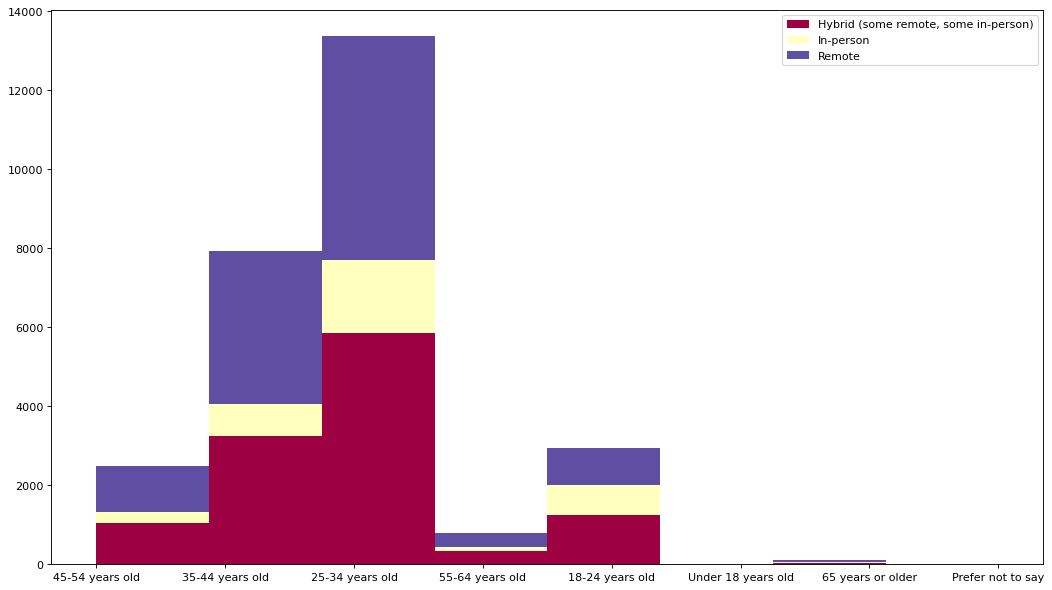

In [8]:
# как распределен тип удалённой работы по возрастам?

# подготовка данных
x_var = 'Age'
groupby_var = 'RemoteWork'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# отрисовка
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# легенда
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.show()

In [9]:
# проверка гипотез о том, как формат удалённой работы зависит от возраста разработчика

α = 0.05 

# N0 = разработчики в возрасте 25-34 имеют ту же долю удалёнщиков, что и все
# N1 = они имеют другую долю

# общие предпочтения
count = df['Age'].count()
sucess = df[df['RemoteWork'] == 'Remote']['Age'].count()
p = sucess / count

# предпочтения интересующей нас группы
count_25_34 = df[df['Age'] == '25-34 years old']['Age'].count()
sucess_25_34 = df[(df['Age'] == '25-34 years old') & (df['RemoteWork'] == 'Remote')]['Age'].count()
p_25_34 = sucess_25_34 / count_25_34

# биномиальный тест
bin_test_result_25_34 = binomtest(k = sucess_25_34, n = count_25_34, p = p, alternative='two-sided')

# вывод его результатов
if bin_test_result_25_34.pvalue < α:
    print('Нулевая гипотеза отвергается, респонденты в возрасте 25-34 имеют другую долю удалёнщиков по сравнению со всеми')
    print('p-val =', bin_test_result_25_34.pvalue)

Нулевая гипотеза отвергается, респонденты в возрасте 25-34 имеют другую долю удалёнщиков по сравнению со всеми
p-val = 0.005844943337018448


In [10]:
# No = разработчики в возрасте 18-24 имеют ту же долю удалёнщиков, что и все
# Na = их доля меньше

count_18_24 = df[df['Age'] == '18-24 years old']['Age'].count()
sucess_18_24 = df[(df['Age'] == '18-24 years old') & (df['RemoteWork'] == 'Remote')]['Age'].count()
p_18_24 = sucess_18_24 / count_18_24


bin_test_result_18_24 = binomtest(k = sucess_18_24, n = count_18_24, p = p, alternative='less')

if bin_test_result_18_24.pvalue < α:
    print('Нулевая гипотеза отвергается, респонденты в возрасте 18-24 имеют меньшую долю удалёнщиков по сравнению со всеми')
    print('p-val =', bin_test_result_18_24.pvalue)

Нулевая гипотеза отвергается, респонденты в возрасте 18-24 имеют меньшую долю удалёнщиков по сравнению со всеми
p-val = 1.2424346836476264e-38


In [11]:
# No = разработчики в возрасте 45-54 имеют ту же долю удалёнщиков, что и все
# Na = их доля больше

count_45_54 = df[df['Age'] == '45-54 years old']['Age'].count()
sucess_45_54 = df[(df['Age'] == '45-54 years old') & (df['RemoteWork'] == 'Remote')]['Age'].count()
p_45_54 = sucess_45_54 / count_45_54


bin_test_result_45_54 = binomtest(k = sucess_45_54, n = count_45_54, p = p, alternative='greater')

if bin_test_result_45_54.pvalue < α:
    print('Нулевая гипотеза отвергается, респонденты в возрасте 45-54 имеют большую долю удалёнщиков по сравнению со всеми')
    print('p-val =', bin_test_result_45_54.pvalue)

Нулевая гипотеза отвергается, респонденты в возрасте 45-54 имеют большую долю удалёнщиков по сравнению со всеми
p-val = 0.0010947652505167171


Можно сделать вывод, что чем старше респондент, тем выше вероятность того, что он будет работать на удалёнке

<Axes: xlabel='CodingActivities_count', ylabel='ConvertedCompYearly_loged'>

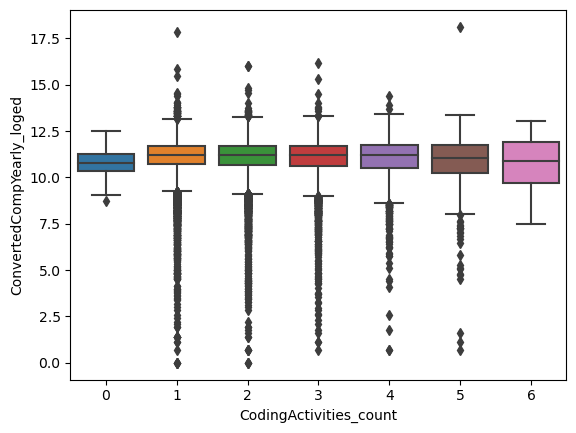

In [12]:
# есть ли корреляция между кол-ом видов активностей, связанных с разработкой (хобби, работа, opensurce и т.д.) разработчика
#и его зарплатой?


# вычисление кол-ва видов активностей респондента, связанных с разработкой
df['CodingActivities_count'] = df['CodingActivities'].apply(lambda x: len(x.split(';')) if type(x) != float else 0)


# логарифмирование зарплаты для получения более симметричного её распределения
df['ConvertedCompYearly_loged'] = np.log(df['ConvertedCompYearly'])


# посмотрим на boxplot для оценки распределения зарплат по кол-ву видов активностей, связанных с разработкой
sns.boxplot(
    x='CodingActivities_count', 
    y='ConvertedCompYearly_loged', 
    data=df)


Существенного влияния на размер зарплаты не выявлено, при этом стат. значимые различия есть

In [13]:
# проверка стат. значимости разницы средних зарплат по группам с разным кол-ом видов активностей, связанных с разработкой

amounts = df['CodingActivities_count'].unique().tolist()
amounts.sort()

res = pd.DataFrame()

# используем t-тест т.к. дисперсия генеральной совокупности неизвестна, но, предположительно, равна
print('Стат. значимые различия:\n')
for l_amount in amounts:
    for h_amount in amounts[l_amount:]:
        ans = {}
        result = ttest_ind(df[df['CodingActivities_count'] == l_amount]['ConvertedCompYearly'],\
              df[df['CodingActivities_count'] == h_amount]['ConvertedCompYearly'])

        if result.pvalue < α:
            ans['Группа 1'] = int(l_amount)
            ans['Группа 2'] = int(h_amount)
            ans['P-value'] = round(result.pvalue, 5)
            res = res._append(ans, ignore_index = True)
            
res

Стат. значимые различия:



,Группа 1,Группа 2,P-value
0,1.0,5.0,0.00002
1,2.0,5.0,0.00000
2,3.0,5.0,0.00054
3,4.0,5.0,0.04562


Так же можно наблюдать, как два кластера - группа 0-4 и группа 5-7 отличаются друг от друга. Группы заметно отличаются кол-ом выбросов (в обе стороны). Можно сделать вывод, что повышение кол-ва видов активностей (до 5 и более), связанных с разработкой, повышает вероятность получить зарплату ближе к средней.
При этом межквартильный размах растягивается вниз.

<Axes: xlabel='group_be_code_activities', ylabel='ConvertedCompYearly_loged'>

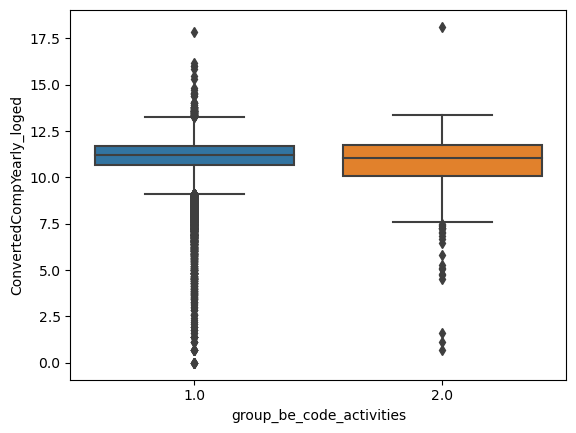

In [14]:
def group_be_code_activities(x): #алгоритм присваивания номера группы
    if x['CodingActivities_count'] <= 4:
        group = 1
    else:
        group = 2
    result = {
        'group_be_code_activities': group,
        'ConvertedCompYearly_loged': x['ConvertedCompYearly_loged']
        
    }
    return pd.Series(result)

# присваивание номера группы
clstr = df.apply(group_be_code_activities, axis = 1)

# визуализация
sns.boxplot(
    x='group_be_code_activities', 
    y='ConvertedCompYearly_loged', 
    data=clstr)

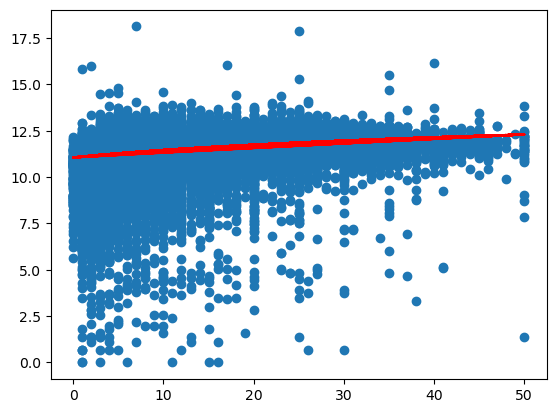

In [15]:
# проверим как влияет кол-во лет работы на зарплату

xx = df[['WorkExp']]
yy = df['ConvertedCompYearly']


# fitting lineural regression
model = LinearRegression()
model.fit(xx, yy)

df['predict_ConvertedCompYearly'] = model.predict(xx)

# обучение модели выполняем на исходных цифрах, на графике по оси Y отображаем логарифм коэф. и ЗП для визуальной наглядности регрессии

# visualisation
plt.scatter(xx, np.log(yy))
plt.plot(xx, np.log(df['predict_ConvertedCompYearly']), color='red')
plt.show()

In [16]:
print('При увеличении опыта работы на 1 год ежегодная ЗП возрастает в среднем на', round(model.coef_[0], 2))

При увеличении опыта работы на 1 год ежегодная ЗП возрастает в среднем на 3125.82


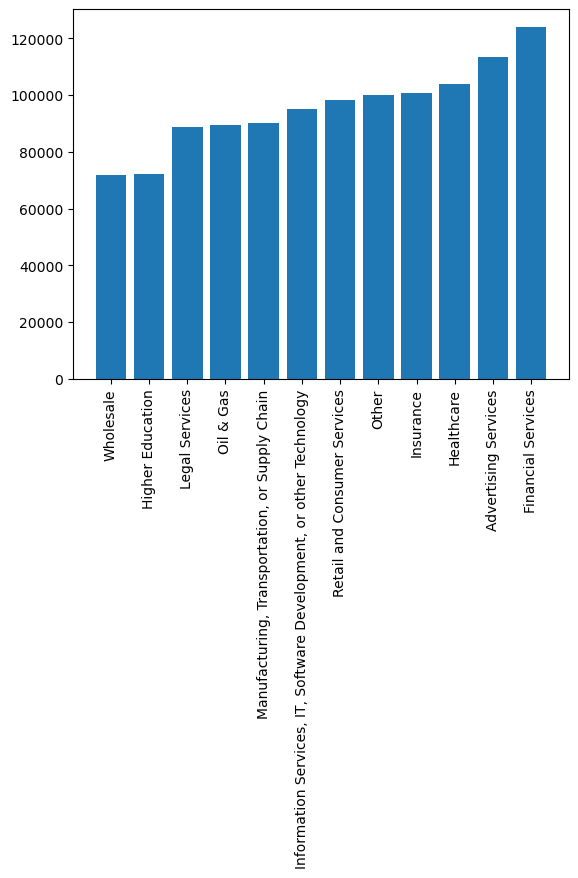

In [17]:
# как отличаются средние зарплаты в зависимости от сферы

mean_ConvertedCompYearly_loged = df.groupby(['Industry']).agg({'ConvertedCompYearly': 'mean'}).round(2)
mean_ConvertedCompYearly_loged.sort_values(by = 'ConvertedCompYearly', inplace = True)

plt.bar(mean_ConvertedCompYearly_loged.index, mean_ConvertedCompYearly_loged['ConvertedCompYearly'])
plt.xticks(rotation=90)
plt.show()